# Build Prediction Models with Random Forests

**Add a brief introduction of Random Forest**

Finish this later

In [1]:
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Read training and testing datasets
df_train = pd.read_csv("../data/train_dataset.csv", parse_dates=['date'])
df_test = pd.read_csv("../data/test_dataset.csv", parse_dates=['date'])

df_train.head()

,date,spy_close,spy_return,spy_direction,daily_sentiment_score,daily_sentiment_label,headline_count
0,2018-03-02,239.550018,0.005155,1,-0.099900,negative,6
1,2018-03-05,242.318726,0.011558,1,-0.110300,positive,6
2,2018-03-06,242.932983,0.002535,0,0.227525,positive,4
3,2018-03-07,242.843948,-0.000367,1,-0.125275,negative,8
4,2018-03-08,244.019043,0.004839,1,0.037960,positive,5


## A. Random Forest Without Sentiment Features

### A-1: Random Forest with SPY Price Features (Return & Direction)

In [3]:
# Features (you can expand later)
feature_cols = ['spy_return']  # simple start — add more later
X_train = df_train[feature_cols]
y_train = df_train['spy_direction']

X_test = df_test[feature_cols]
y_test = df_test['spy_direction']

In [4]:
# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.6428571428571429

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.67      0.58        21
           1       0.76      0.63      0.69        35

    accuracy                           0.64        56
   macro avg       0.64      0.65      0.64        56
weighted avg       0.67      0.64      0.65        56



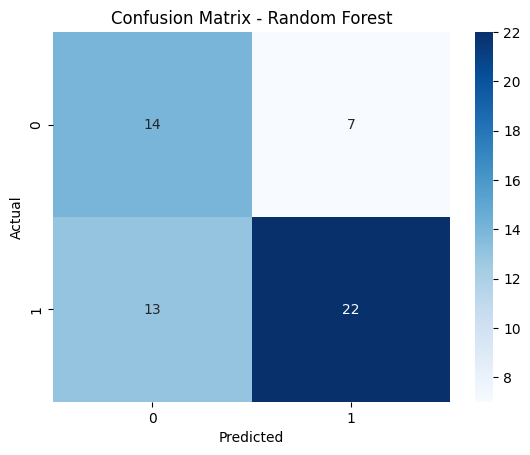

In [5]:
# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### A-2: Random Forest With Additional Market Features

In [ ]:
# Do this later

## B. Random Forest With Sentiment Features

In [6]:
# Features (you can expand later)
feature_cols = ['spy_return', 'daily_sentiment_score']  # simple start — add more later
X_train = df_train[feature_cols]
y_train = df_train['spy_direction']

X_test = df_test[feature_cols]
y_test = df_test['spy_direction']

In [7]:
# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33        21
           1       0.60      0.60      0.60        35

    accuracy                           0.50        56
   macro avg       0.47      0.47      0.47        56
weighted avg       0.50      0.50      0.50        56



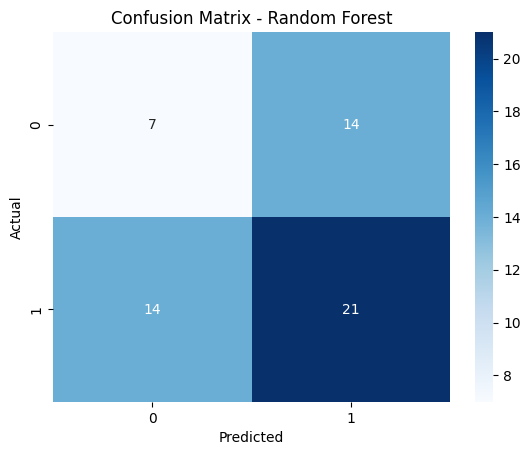

In [8]:
# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Some Comments:**

Why adding daily sentiment score feature does not improve the prediction?  

Possible reasons:  
* Misalignment in time: Today's sentiment might not reflect tomorrow's market direction directly
* Weak signal: Headlines may not be market-moving (neutral, repetitive, low impact)
* Noisy average: Averaging across many headlines may dilute sharp signals
* Model not tuned for it: Model might need more complex interaction terms or better engineered features



Possible improvements:
* Lag or Shift Sentiment Score: Try using yesterday’s sentiment to predict today’s market movement, like you do with spy_return.shift(1). The market may react to sentiment with a delay — especially for retail-oriented news.
* Filter for Strong Sentiment Days Only. Create a flag or filter to highlight days with unusually positive or negative sentiment.This helps the model focus on actionable sentiment days.
* Add more market related features.
* Use cross-validation to tune hyperparameters.